📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       149
           1       0.90      0.89      0.89       129

    accuracy                           0.90       278
   macro avg       0.90      0.90      0.90       278
weighted avg       0.90      0.90      0.90       278



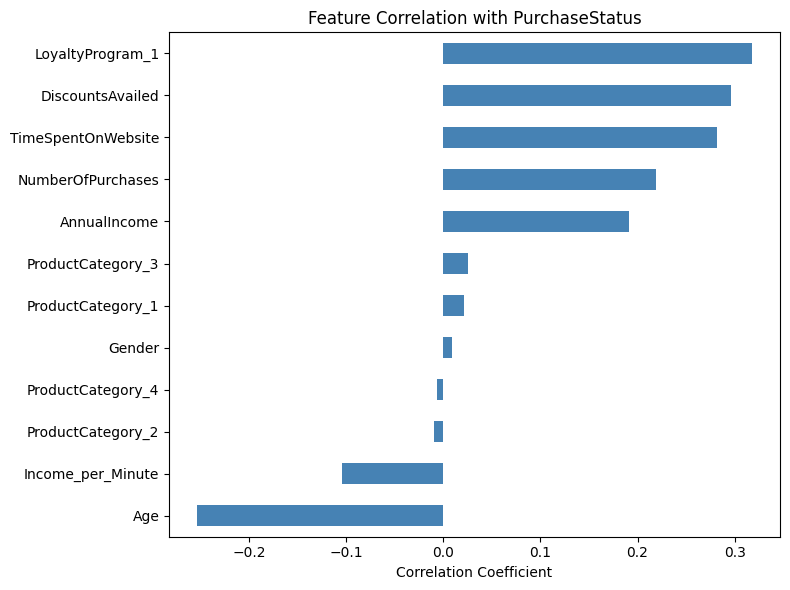

In [7]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_processing.feature_engineer import feature_engineer

# Load and engineer features
df = pd.read_csv("../data/processed/cleaned_customer_purchase_data.csv")
df = feature_engineer(df)

#  Define features and target
X = df.drop("PurchaseStatus", axis=1)
y = df["PurchaseStatus"]

# Split the data into test and training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Train XGBoost model
model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train)

# model evaluation
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# correlation with PurchaseStatus (bar chart)
correlations = df.corr(numeric_only=True)["PurchaseStatus"].drop("PurchaseStatus").sort_values()
plt.figure(figsize=(8, 6))
correlations.plot(kind="barh", color="steelblue")
plt.title("Feature Correlation with PurchaseStatus")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()
